<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_4/Chapter8_Demo_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
from tensorflow.keras import regularizers

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
max_value=float(x_train.max())
x_train=x_train.astype('float32')/max_value
x_test=x_test.astype('float32')/max_value

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
np.prod(x_train.shape[1:])

784

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
(x_train.shape,x_test.shape)

((60000, 784), (10000, 784))

In [9]:
input_dim=x_train.shape[1]
encoding_dim=32
compression_factor=float(input_dim)/encoding_dim
print("compression factor: %s"% compression_factor)

compression factor: 24.5


In [10]:
autoencoder=Sequential()
autoencoder.add(Dense(encoding_dim,input_shape=(input_dim,),activation='relu'))
autoencoder.add(Dense(input_dim,activation='sigmoid'))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
input_img=Input(shape=(input_dim))
encoder_layer=autoencoder.layers[0]
encoder=Model(input_img,encoder_layer(input_img))
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2766 - val_loss: 0.1846
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1682 - val_loss: 0.1523
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1433 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1278 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1172 - val_loss: 0.1119
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1102 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1053 - val_loss: 0.1019
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1016 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0972 - val_loss: 0.0951

In [14]:
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test.shape[0],size=num_images)
encoded_imgs=encoder.predict(x_test)
decoded_imgs=autoencoder.predict(x_test)

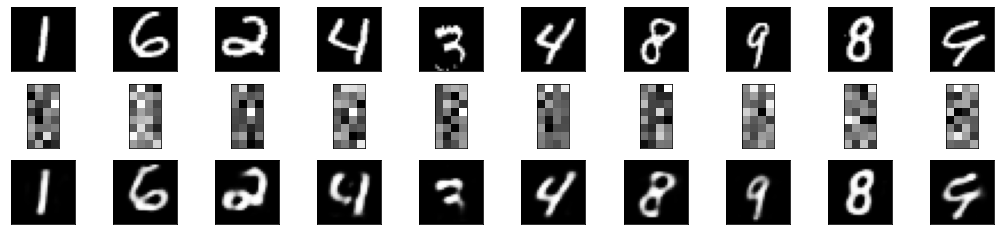

In [15]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image 
    ax = plt.subplot(3, num_images, i + 1) # in hinh tren dong 1
    plt.imshow(x_test[image_idx].reshape(28, 28)) # tra lai hinh dang ban dau cho hinh
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1) # in hinh tren dong 2
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) # hinh dang co chai 8 * 4
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1) # in hinh tren dong 3
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) # tra lai hinh dang cua hinh output
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
autoencoder.save('decoder.h5')

In [17]:
encoder.save('encoder.h5')

In [18]:
from tensorflow.keras.models import load_model

In [19]:
encoder=load_model('encoder.h5')
decoder=load_model('decoder.h5')

In [20]:
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(x_test)

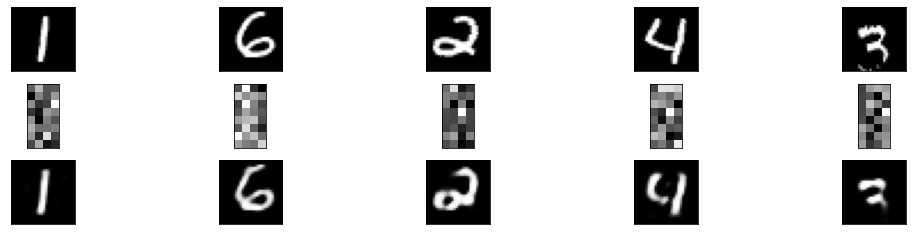

In [21]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

FileNotFoundError: ignored

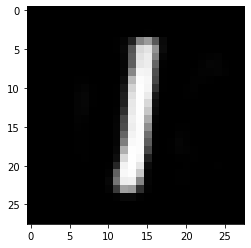

In [22]:
for i, image_idx in enumerate(random_test_images): 
    # plot reconstructed image    
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    image_name = "Demo_Simple/image_" + str(image_idx) + ".jpg"
    plt.savefig(image_name)
    plt.show()